In [1]:
## imports
import pandas as pd
import numpy as np

## import the plotnine package
## make sure it's installed
## if not installed, can use
## ! pip install plotnine
import plotnine
from plotnine import *


## print multiple things from same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# A few plot types

## Load DC crime data

In [2]:
## load data on 2020 crimes in DC
dc_crim_2020 = pd.read_csv("https://opendata.arcgis.com/datasets/f516e0dd7b614b088ad781b0c4002331_2.csv")
dc_crim_2020.head()


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-76.943067,38.883694,20091035,2020/06/22 02:36:32+00,EVENING,OTHERS,THEFT/OTHER,400 - 499 BLOCK OF BURBANK STREET SE,404939.930531,135095.909819,...,007703 2,7703.0,Precinct 103,38.883686,-76.943065,NaN,2020/06/20 12:00:29+00,2020/06/20 13:00:36+00,101491535,NaN
1,-76.972170,38.937778,20091036,2020/06/21 17:47:13+00,DAY,OTHERS,MOTOR VEHICLE THEFT,3900 - 3999 BLOCK OF 24TH STREET NE,402412.960000,141098.510000,...,009400 3,9400.0,Precinct 69,38.937770,-76.972168,NaN,2020/06/20 07:00:51+00,2020/06/20 16:00:55+00,101491536,NaN
2,-77.004475,38.905651,20091038,2020/06/21 17:49:16+00,DAY,OTHERS,THEFT F/AUTO,100 - 208 BLOCK OF M STREET NE,399612.050000,137531.800000,...,010601 2,10601.0,Precinct 144,38.905644,-77.004473,NOMA,2020/06/16 22:00:36+00,2020/06/20 14:30:44+00,101491537,NaN
3,-76.929840,38.896017,20091042,2020/06/21 17:54:32+00,DAY,OTHERS,MOTOR VEHICLE THEFT,410 - 511 BLOCK OF 50TH STREET NE,406086.470000,136464.590000,...,007804 2,7804.0,Precinct 97,38.896009,-76.929838,NaN,2020/06/21 16:30:53+00,2020/06/21 18:00:35+00,101491538,NaN
4,-76.980386,38.849939,20091044,2020/06/21 18:02:30+00,DAY,OTHERS,THEFT/OTHER,1700 - 1799 BLOCK OF TOBIAS DRIVE SE,401702.750000,131347.470000,...,007404 1,7404.0,Precinct 117,38.849931,-76.980384,NaN,2020/06/20 10:56:46+00,2020/06/20 15:33:56+00,101491539,NaN


## Plot type one: bar plot

**Goal**: bar plot where x axis is what shift it is; y axis is the count of unique crime reports (using `OBJECT_ID` as unique indicator)

In [3]:
## step one: create the summary we want to plot
count_byshift = pd.DataFrame(dc_crim_2020.groupby('SHIFT')['OBJECTID'].nunique()).reset_index()
count_byshift


,SHIFT,OBJECTID
0,DAY,10092
1,EVENING,12315
2,MIDNIGHT,5507


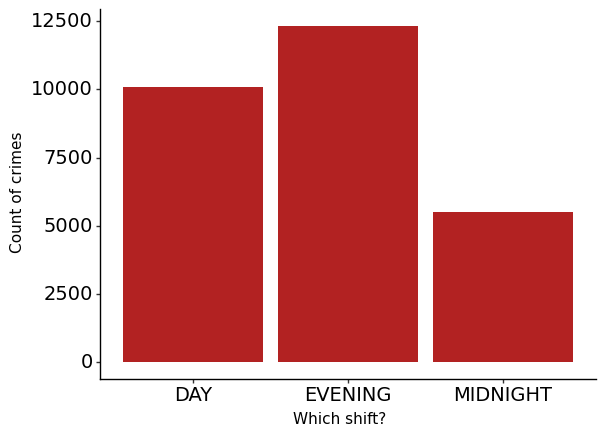

<ggplot: (8790731287113)>

In [4]:

## one way: plot and display in notebook
(ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) + # base layer with data and x and y axis 
            geom_bar(stat = "identity", fill = "firebrick") + # telling it to expect a bar chart; identity
             # arg just means to use the y value 
            theme_classic() + # aesthetics
            xlab("Which shift?") + # custom label for x axis
            ylab("Count of crimes") + # custom label for y axis
            theme(axis_text = element_text(size = 14, color = "black"))) # make font bigger


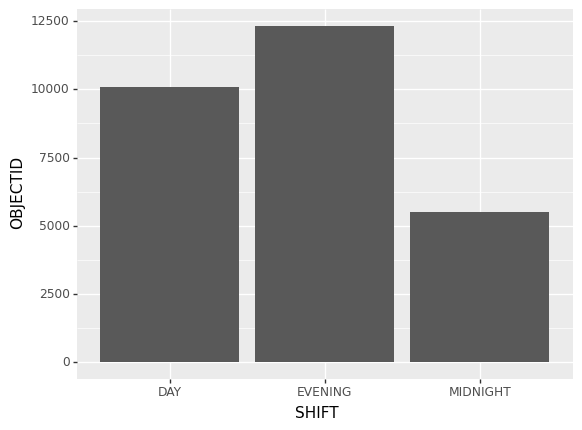

<ggplot: (8790731605815)>

In [5]:

## another way: save to png- right now,
## it's writing to same path our df is stored in; 
plot_shifts = (ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) +
            geom_bar(stat = "identity", fill = "firebrick") +
            theme_classic() +
            xlab("Which shift?") +
            ylab("Count of crimes") +
            theme(axis_text = element_text(size = 14, color = "black")))
plot_shifts.save("plot_shifts.png", 
                width = 12,
                height = 8,
                verbose = False)


## what happens if we don't specify theme or color of bars? diff aesthetics
## also doesnt give us informative x and y labels (for pset please give 
## informative labels)
(ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) +
            geom_bar(stat = "identity"))

## Plot type two: line graph

**Goal**: bar plot where x axis is month; y axis is the count of unique crime reports (using `OBJECT_ID` as unique indicator); want line graph to be able to see trends over time in count of reported crimes

In [6]:
## group by month and find unique reports
### first, extract month from report_dat (just 
### with the noncleaned version)

dc_crim_2020['report_month'] = pd.to_datetime(dc_crim_2020.REPORT_DAT,
                                             errors = "coerce").dt.month
### double check this worked
dc_crim_2020[["REPORT_DAT", "report_month"]].sample(n = 3)

### then, group by month and find unique reports; same syntax as above
### just a diff grouping variable 
count_bymonth = pd.DataFrame(dc_crim_2020.groupby('report_month')['OBJECTID'].nunique()).reset_index()
count_bymonth


,REPORT_DAT,report_month
26209,2020/08/30 23:43:30+00,8
11179,2020/03/23 02:47:15+00,3
13388,2020/01/28 04:21:18+00,1


,report_month,OBJECTID
0,1,2948
1,2,2537
2,3,2200
3,4,1652
4,5,1831
5,6,2275
6,7,2132
7,8,2431
8,9,2572
9,10,2562


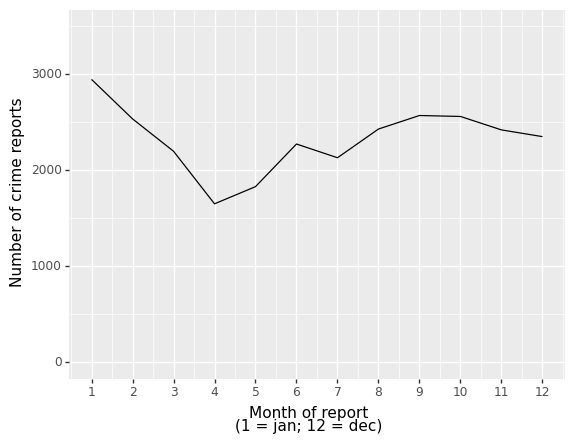

<ggplot: (8790733814212)>

In [7]:

### finally, plot result as line graph
### nearly identical syntax to above
### but uses month as the xaxis rather than
### police shift and geom_line()
### rather than geom_bar()
(ggplot(count_bymonth, aes(x = 'report_month', 
            y = 'OBJECTID')) +
            geom_line() +
            ylim(0, 3500) +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            scale_x_continuous(breaks = np.arange(1, 13)))

## Making more complex: adding facets

What if we want to create the above but visualize separately for each ward?

Can group by two variables (see lecture slide) and add a line to facet_wrap

,report_month,WARD,OBJECTID
0,1,1,369
1,1,2,654
2,1,3,222
3,1,4,313
4,1,5,456


,report_month,WARD,OBJECTID
91,12,4,253
92,12,5,380
93,12,6,305
94,12,7,343
95,12,8,278


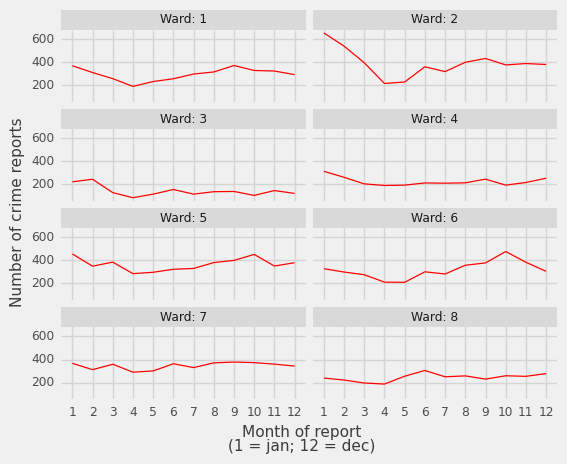

<ggplot: (8790732038873)>

In [8]:
### add ward as grouping var
count_bymonth_byw = pd.DataFrame(dc_crim_2020.groupby(['report_month',
                                                   'WARD'])['OBJECTID'].nunique()).reset_index()
count_bymonth_byw.head()
count_bymonth_byw.tail()

## make the facetting var prettier 
## by noting "Ward" before the
count_bymonth_byw['WARD_name'] = 'Ward: ' + count_bymonth_byw.WARD.astype(str)

### finally, plot result as line graph
### nearly identical syntax to above
### but uses month as the xaxis rather than
### police shift and geom_line()
### rather than geom_bar()
(ggplot(count_bymonth_byw, aes(x = 'report_month', 
            y = 'OBJECTID')) +
            geom_line(color = "red") +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            facet_wrap('WARD_name', ncol = 2) + # ADDITIONAL LINE 
            scale_x_continuous(breaks = np.arange(1, 13)) +
            theme_538() # using 538 theme 
            ) 

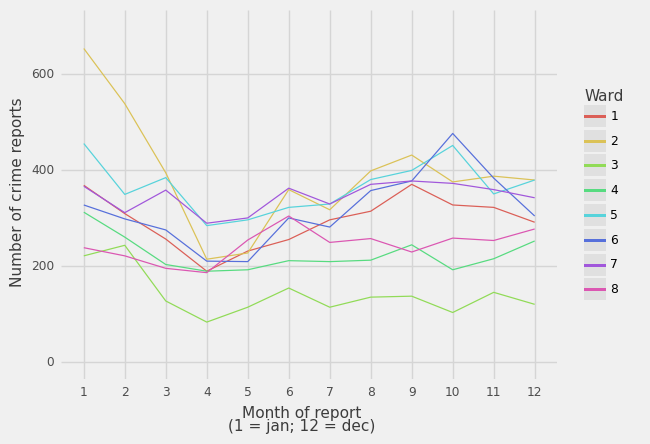

<ggplot: (8790731282695)>

In [12]:
### rather than geom_bar()
(ggplot(count_bymonth_byw, aes(x = 'report_month', 
            y = 'OBJECTID', group = 'factor(WARD)', color = 'factor(WARD)')) +
            geom_line() +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            scale_x_continuous(breaks = np.arange(1, 13)) +
            theme_538() + # using 538 theme +
             labs(color = "Ward") +
             ylim(0, 700)
            ) 